In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

# import tensorflow as tf

### Replace this:
### from keras.losses import sparse_categorical_crossentropy
### with this:

# from tensorflow.keras.losses import sparse_categorical_crossentropy


In [2]:
data_dir = 'Bitcoin Price.csv'
df = pd.read_csv(data_dir)

In [3]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [4]:
df.tail()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
2608,BTC,2020-12-31,29111.52157,28872.82977,29280.04533,27916.62506
2609,BTC,2021-01-01,29333.60512,28935.81098,29601.59490,28753.41231
2610,BTC,2021-01-02,32154.16736,29353.64061,33064.67353,29012.92789
2611,BTC,2021-01-03,33002.53643,32074.10661,34452.08034,31885.58162
2612,BTC,2021-01-04,31431.61228,32788.58345,33358.39935,28154.11030


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2613 non-null   object 
 1   Date                 2613 non-null   object 
 2   Closing Price (USD)  2613 non-null   float64
 3   24h Open (USD)       2613 non-null   float64
 4   24h High (USD)       2613 non-null   float64
 5   24h Low (USD)        2613 non-null   float64
dtypes: float64(4), object(2)
memory usage: 122.6+ KB


In [6]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2613.000000,2613.000000,2613.000000,2613.000000
mean,4339.813009,4326.982762,4453.429605,4198.204419
std,4854.204340,4825.405152,4987.471324,4671.711458
min,108.584830,108.584830,118.675000,83.328330
25%,447.585990,447.233000,454.938000,439.454000
50%,1319.700000,1311.588740,1338.987500,1289.492500
75%,7928.417416,7937.610000,8151.097500,7683.665283
max,33002.536430,32788.583450,34452.080340,31885.581620


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

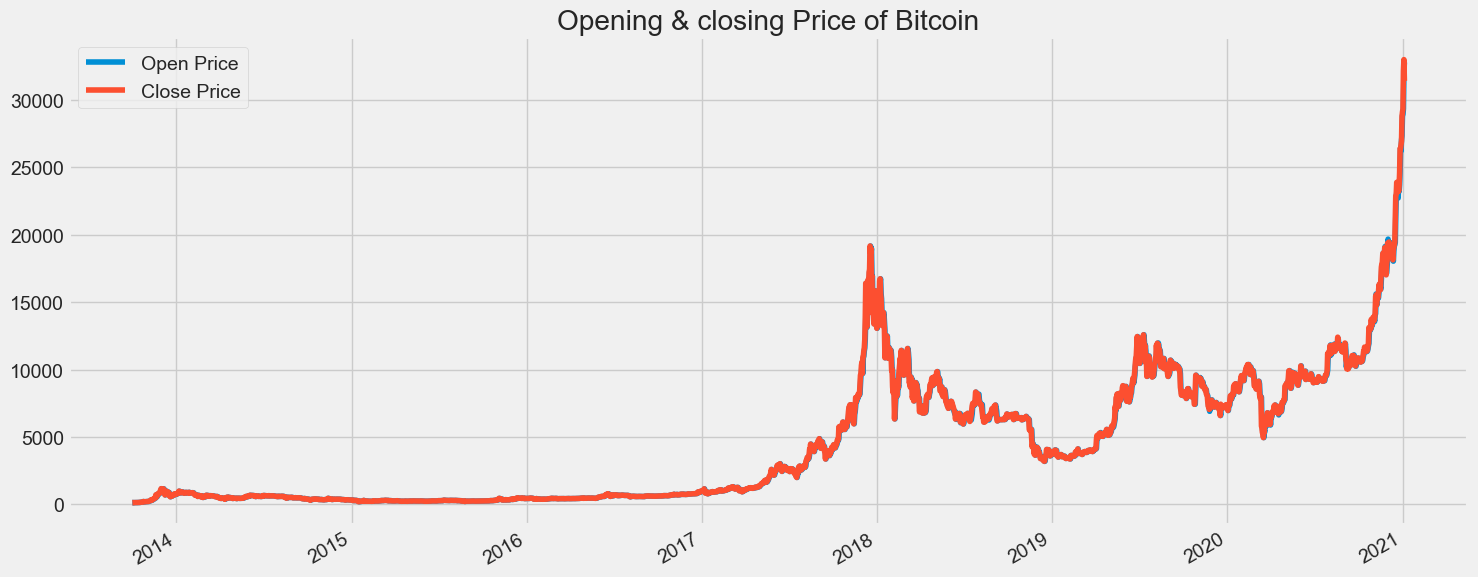

In [8]:
plt.figure(figsize=(15, 6))
df[r'24h Open (USD)'].plot()
df[r'Closing Price (USD)'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening & closing Price of Bitcoin')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

You've extracted the 'Closing Price (USD)' column from your DataFrame, converted it to a DataFrame again, and then to a NumPy array.

The shape of your data variable should be (number_of_rows, 1) since you have only one column. Let's verify the shape of your data variable:

In [9]:
n_cols = 1
dataset= df[r'Closing Price (USD)']
dataset = pd.DataFrame(dataset)
data= dataset.values

data.shape

(2613, 1)

 Instead of converting the 'Closing Price (USD)' column to a DataFrame and then to a NumPy array, you can directly extract it as a NumPy array.you can directly reshape the column without converting it into a DataFrame. This code directly reshapes the column into a 2D NumPy array with one column.







In [10]:
n_cols = 1
data = df['Closing Price (USD)'].values.reshape(-1, n_cols)

print(data.shape)


(2613, 1)


In [11]:
data = df['Closing Price (USD)'].values.reshape(-1, 1)

print(data.shape)


(2613, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [13]:
train_size= int(len(data)*0.75)
test_size = len(data)- train_size
print('Train Size: ', train_size, 'Test Size:',test_size)

Train Size:  1959 Test Size: 654


In [14]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1959, 1)

In [15]:
x_train=[]
y_train=[]
time_steps= 60
n_cols =1
for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps: i , :n_cols] )
    y_train.append(train_data[i , :n_cols] )
    if i <=time_steps:
        print( 'X_train:', x_train)
        print( 'y _ train', y_train)

X_train: [array([[0.00045814],
       [0.00051287],
       [0.        ],
       [0.00030674],
       [0.00038773],
       [0.00036695],
       [0.0004016 ],
       [0.00043923],
       [0.00047012],
       [0.00052825],
       [0.00050753],
       [0.00052723],
       [0.00054109],
       [0.0008104 ],
       [0.00074842],
       [0.00103905],
       [0.00089191],
       [0.00104478],
       [0.00133663],
       [0.00157336],
       [0.00169424],
       [0.00209912],
       [0.00242331],
       [0.00280042],
       [0.00218187],
       [0.00202003],
       [0.00210104],
       [0.00238874],
       [0.00255888],
       [0.00270005],
       [0.00265824],
       [0.00271977],
       [0.00274663],
       [0.0027956 ],
       [0.00309244],
       [0.00353971],
       [0.00424602],
       [0.00467386],
       [0.00565156],
       [0.00676472],
       [0.00539013],
       [0.00597055],
       [0.00697855],
       [0.00756659],
       [0.00894904],
       [0.00913599],
       [0.00947383],
   

In [16]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [17]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],n_cols))

In [18]:
x_train.shape,y_train.shape

((1899, 60, 1), (1899, 1))

In [19]:
model = Sequential([
   LSTM(50, return_sequences = True, input_shape=(x_train.shape[1],n_cols)),
   LSTM(64, return_sequences = False),
   Dense(32),
   Dense(16),
   Dense(n_cols)
])

model.compile(optimizer='adam',loss ='mse',metrics ='mean_absolute_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100


60/60 [==============================] - 7s 34ms/step - loss: 0.0015 - mean_absolute_error: 0.0203
Epoch 2/100
60/60 [==============================] - 2s 37ms/step - loss: 2.7392e-04 - mean_absolute_error: 0.0075
Epoch 3/100
60/60 [==============================] - 2s 34ms/step - loss: 2.6500e-04 - mean_absolute_error: 0.0099
Epoch 4/100
60/60 [==============================] - 2s 30ms/step - loss: 2.7750e-04 - mean_absolute_error: 0.0095
Epoch 5/100
60/60 [==============================] - 2s 33ms/step - loss: 2.0830e-04 - mean_absolute_error: 0.0079
Epoch 6/100
60/60 [==============================] - 2s 38ms/step - loss: 2.1035e-04 - mean_absolute_error: 0.0084
Epoch 7/100
60/60 [==============================] - 2s 36ms/step - loss: 2.2881e-04 - mean_absolute_error: 0.0089
Epoch 8/100
60/60 [==============================] - 2s 30ms/step - loss: 1.8113e-04 - mean_absolute_error: 0.0080
Epoch 9/100
60/60 [==============================] - 2s 31ms/step - loss: 1.7369e-

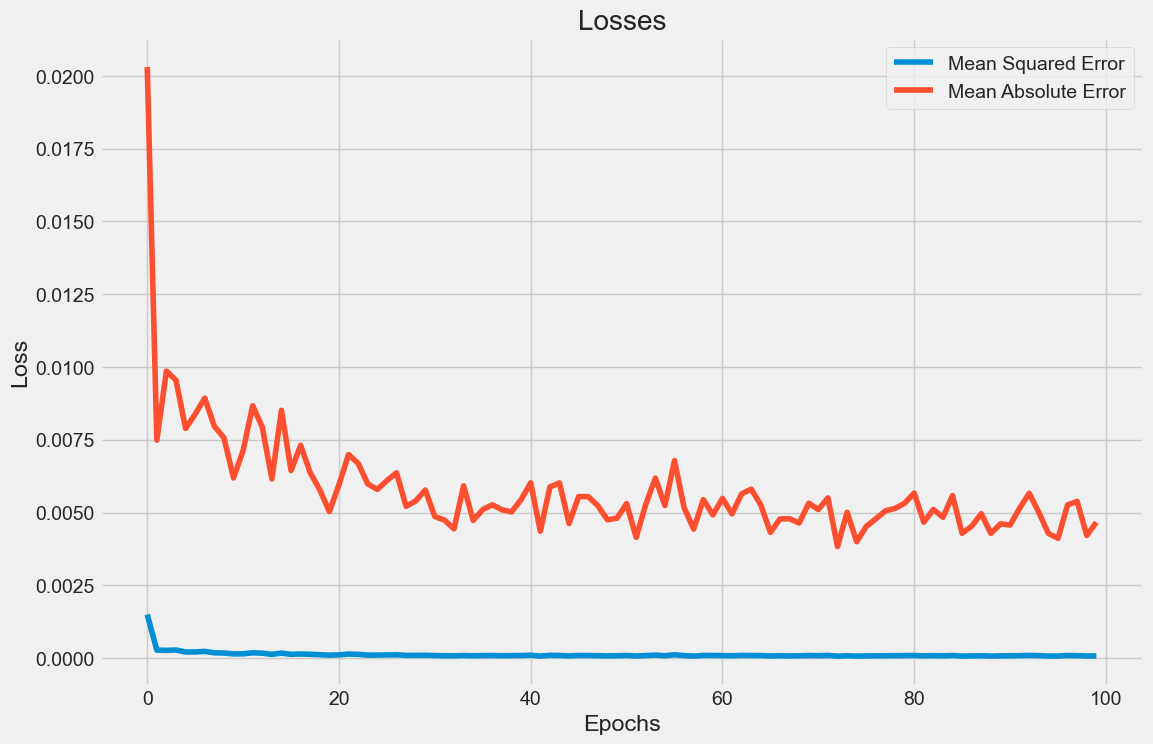

In [22]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [23]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []  
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i - time_steps:i, 0:n_cols])  # Changed the index to be consistent with slicing
    y_test.append(test_data[i, 0:n_cols])  # Changed the index to be consistent with slicing

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))  


In [24]:
x_test.shape, y_test.shape

((654, 60, 1), (654, 1))

In [25]:
predictions = model.predict(x_test)

21/21 [==============================] - 2s 16ms/step


In [26]:
predictions=scaler.inverse_transform(predictions)
predictions.shape

(654, 1)

In [27]:
y_test=scaler.inverse_transform(y_test)

rmse=np.sqrt(np.mean(y_test-predictions)**2).round(2)
rmse

195.04

In [28]:
preds_acts= pd.DataFrame(data={'Predictions': predictions.flatten(),'Actuals': y_test.flatten()})

preds_acts

,Predictions,Actuals
0,4196.686035,4027.787395
1,4224.247559,3974.811429
2,4192.993164,3987.305225
3,4192.210449,3977.707443
4,4186.153320,3968.438701
...,...,...
649,27016.152344,29111.521570
650,27054.884766,29333.605120
651,27163.779297,32154.167360
652,30132.376953,33002.536430


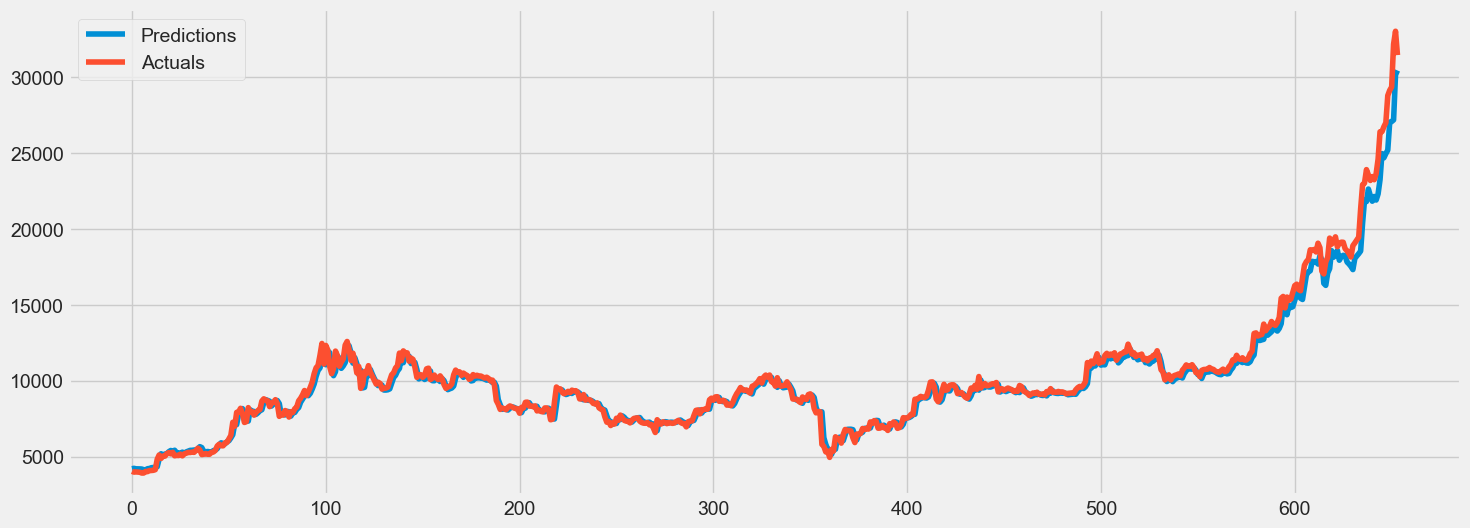

In [29]:
plt.figure(figsize= (16, 6))
plt.plot(preds_acts["Predictions"])
plt.plot(preds_acts["Actuals"])
plt.legend(['Predictions','Actuals'])
plt.show()

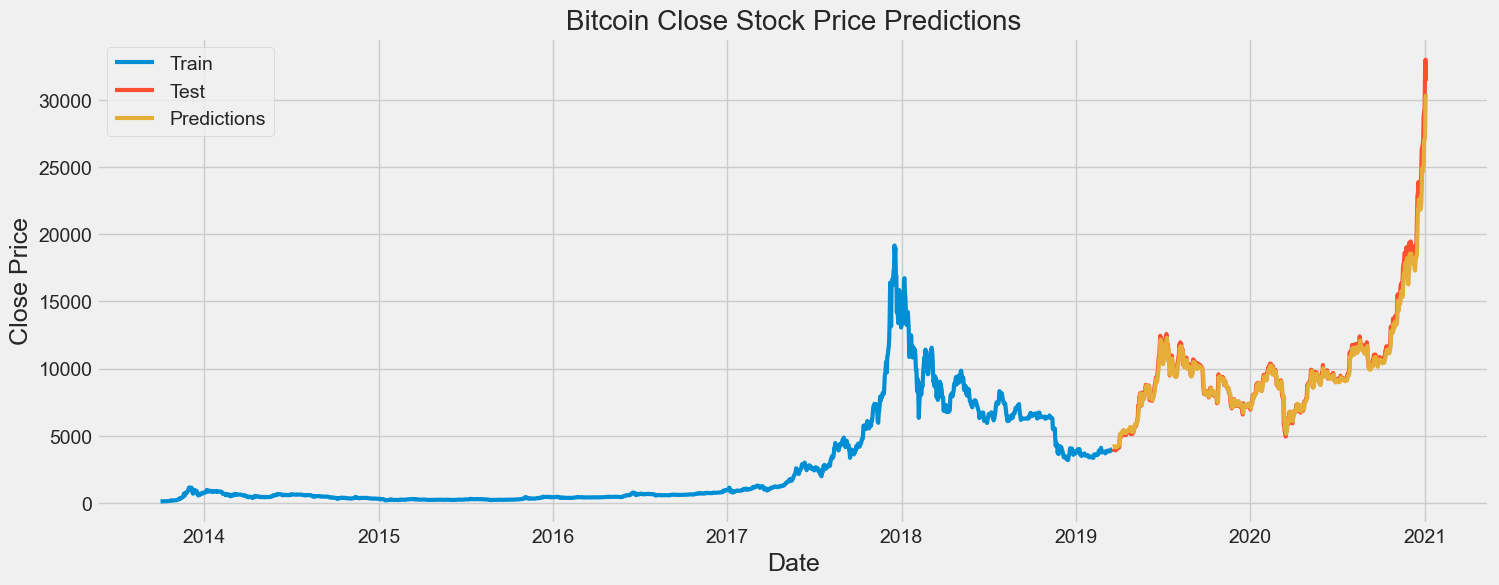

In [30]:
train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test['Predictions'] = predictions  # Corrected variable name

plt.figure(figsize=(16, 6))
plt.title('Bitcoin Close Stock Price Predictions', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Closing Price (USD)'], linewidth=3)
plt.plot(test['Closing Price (USD)'], linewidth=3)
plt.plot(test['Predictions'], linewidth=3)
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()
